<a href="https://colab.research.google.com/github/JiveshDhakate/Machine-Learning/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Import and Libraries Imported**

In [ ]:
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving HousePredictionDataset.csv to HousePredictionDataset (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
 
df = pd.read_csv('HousePredictionDataset.csv')


# Printing first 5 records of the dataset
print(df.head(5))



   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


**Data Interpretation**

In [ ]:
df.shape
#Shape Gives No.of Rows and Columns Resp.


(2919, 13)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


**Features And Their Description In Dataset**
1.	Id-To count the records.

2.	MSSubClass- Identifies the type of dwelling involved in the sale.

3.	MSZoning-Identifies the general zoning classification of the sale.

4.	LotArea	-Lot size in square feet.

5.	LotConfig-Configuration of the lot

6.	BldgType-Type of dwelling

7.	OverallCond-Rates the overall condition of the house

8.	YearBuilt-Original construction year

9.	YearRemodAdd-Remodel date (same as construction date if no remodeling or additions).

10.	Exterior1st-Exterior covering on house

11.	BsmtFinSF2-Type 2 finished square feet.

12.	TotalBsmtSF-Total square feet of basement area

13.	SalePrice-To be predicted

In [ ]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2914    False
2915    False
2916    False
2917    False
2918    False
Length: 2919, dtype: bool

In [ ]:
print("Correlation")
df.corr()

Correlation


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.008931,-0.040746,-0.002839,-0.016581,-0.050438,0.018251,-0.024924,-0.021917
MSSubClass,0.008931,1.000000,-0.201730,-0.065625,0.034409,0.043315,-0.072530,-0.219965,-0.084284
LotArea,-0.040746,-0.201730,1.000000,-0.035617,0.024128,0.021612,0.084059,0.254138,0.263843
OverallCond,-0.002839,-0.065625,-0.035617,1.000000,-0.368477,0.047654,0.041501,-0.174002,-0.077856
YearBuilt,-0.016581,0.034409,0.024128,-0.368477,1.000000,0.612235,-0.027595,0.408515,0.522897
YearRemodAdd,-0.050438,0.043315,0.021612,0.047654,0.612235,1.000000,-0.062153,0.298107,0.507101
BsmtFinSF2,0.018251,-0.072530,0.084059,0.041501,-0.027595,-0.062153,1.000000,0.089410,-0.011378
TotalBsmtSF,-0.024924,-0.219965,0.254138,-0.174002,0.408515,0.298107,0.089410,1.000000,0.613581
SalePrice,-0.021917,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


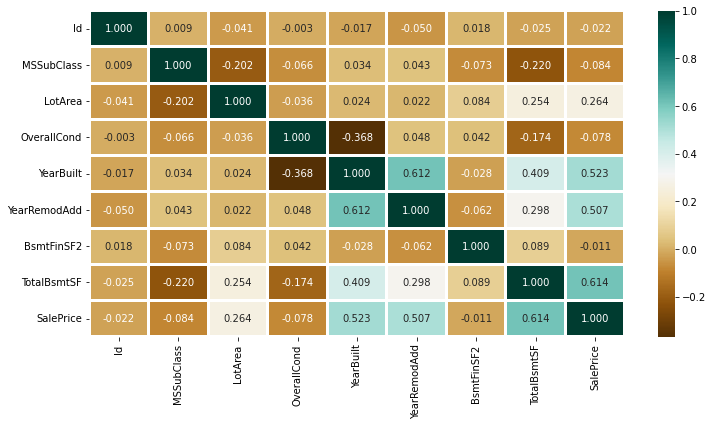

In [ ]:
#Graphical Representation of Correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),cmap = 'BrBG',fmt = '.3f',linewidths = 2,annot = True)


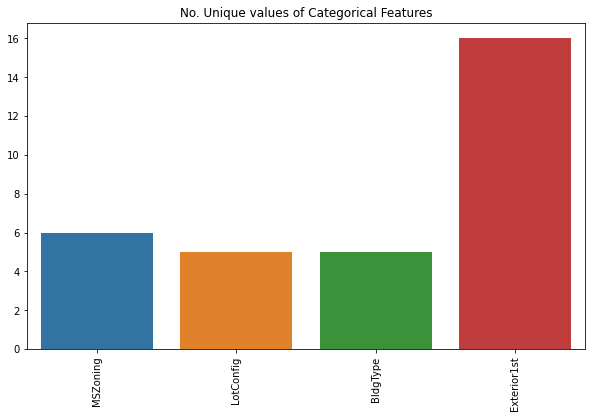

In [ ]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)



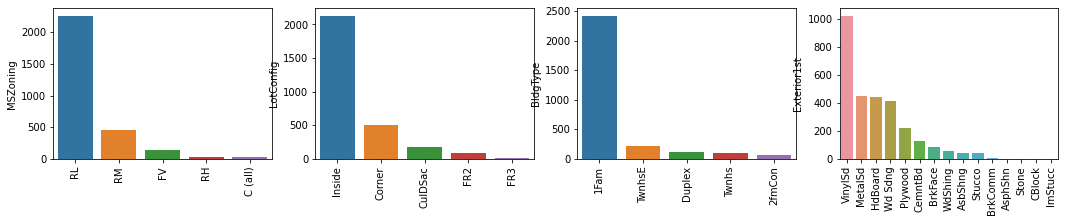

In [ ]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = df[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


**Data Preprocessing**

In [ ]:
#To make Data Symmetric,empty values in SalesPrice are replaced with it's mean values
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())


In [ ]:
df.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [ ]:
#Creating a new Dataset by dropping null values as null values are few compared to the dataset entries
new_ds = df.dropna()


In [ ]:
#Checking If New Dataset has any null value left
new_ds.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [ ]:
# As Categorical Variable consist of String variable they are converted to int values with Library OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

s = (new_ds.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_ds[object_cols]))
OH_cols.index = new_ds.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_ds.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Splitting Dataset into Training and Testing**

In [ ]:
#Splitting Dataset into Training and Testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#Y is the Salesprices(target) and X contains all the Other Attributes/features
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']


from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(Y)

# Split the training set into
# training and testing set
#Training Set Consist Of 75% of dataset entries and Testing Set Consist of 25% of entries
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25, random_state=0)

**Implementation Of Various Machine Learning Models**

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
print ('R Squared =',r2_score(Y_test, Y_pred))
print("Mean Absolute Error : ",mean_absolute_percentage_error(Y_test, Y_pred))

R Squared = 0.33185844908359274
Mean Absolute Error :  0.6966610695665575


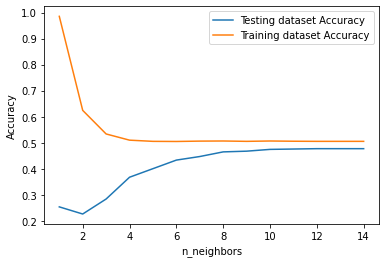

In [ ]:
#KNearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#As From the above graph we can say that the optimal value for k will k>=9 as both accuracy for testing dataset and training dataset runs parallel to each other
knn = KNeighborsClassifier(9)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
y_predict = knn.predict(X_test)
print ('R Squared =',r2_score(Y_test, Y_pred))
print("Mean Absolute Error : ",mean_absolute_percentage_error(Y_test, Y_pred))

R Squared = -0.0892421240739043
Mean Absolute Error :  0.9954870545652684


In [ ]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test) 
print ('R Squared =',r2_score(Y_test, Y_pred))
print("Mean Absolute Error : ",mean_absolute_percentage_error(Y_test, Y_pred))

R Squared = -0.0892421240739043
Mean Absolute Error :  0.9954870545652684
